In [17]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Read the cleaned data
df = pd.read_csv('../data/cleaned/data_cleaned.csv')


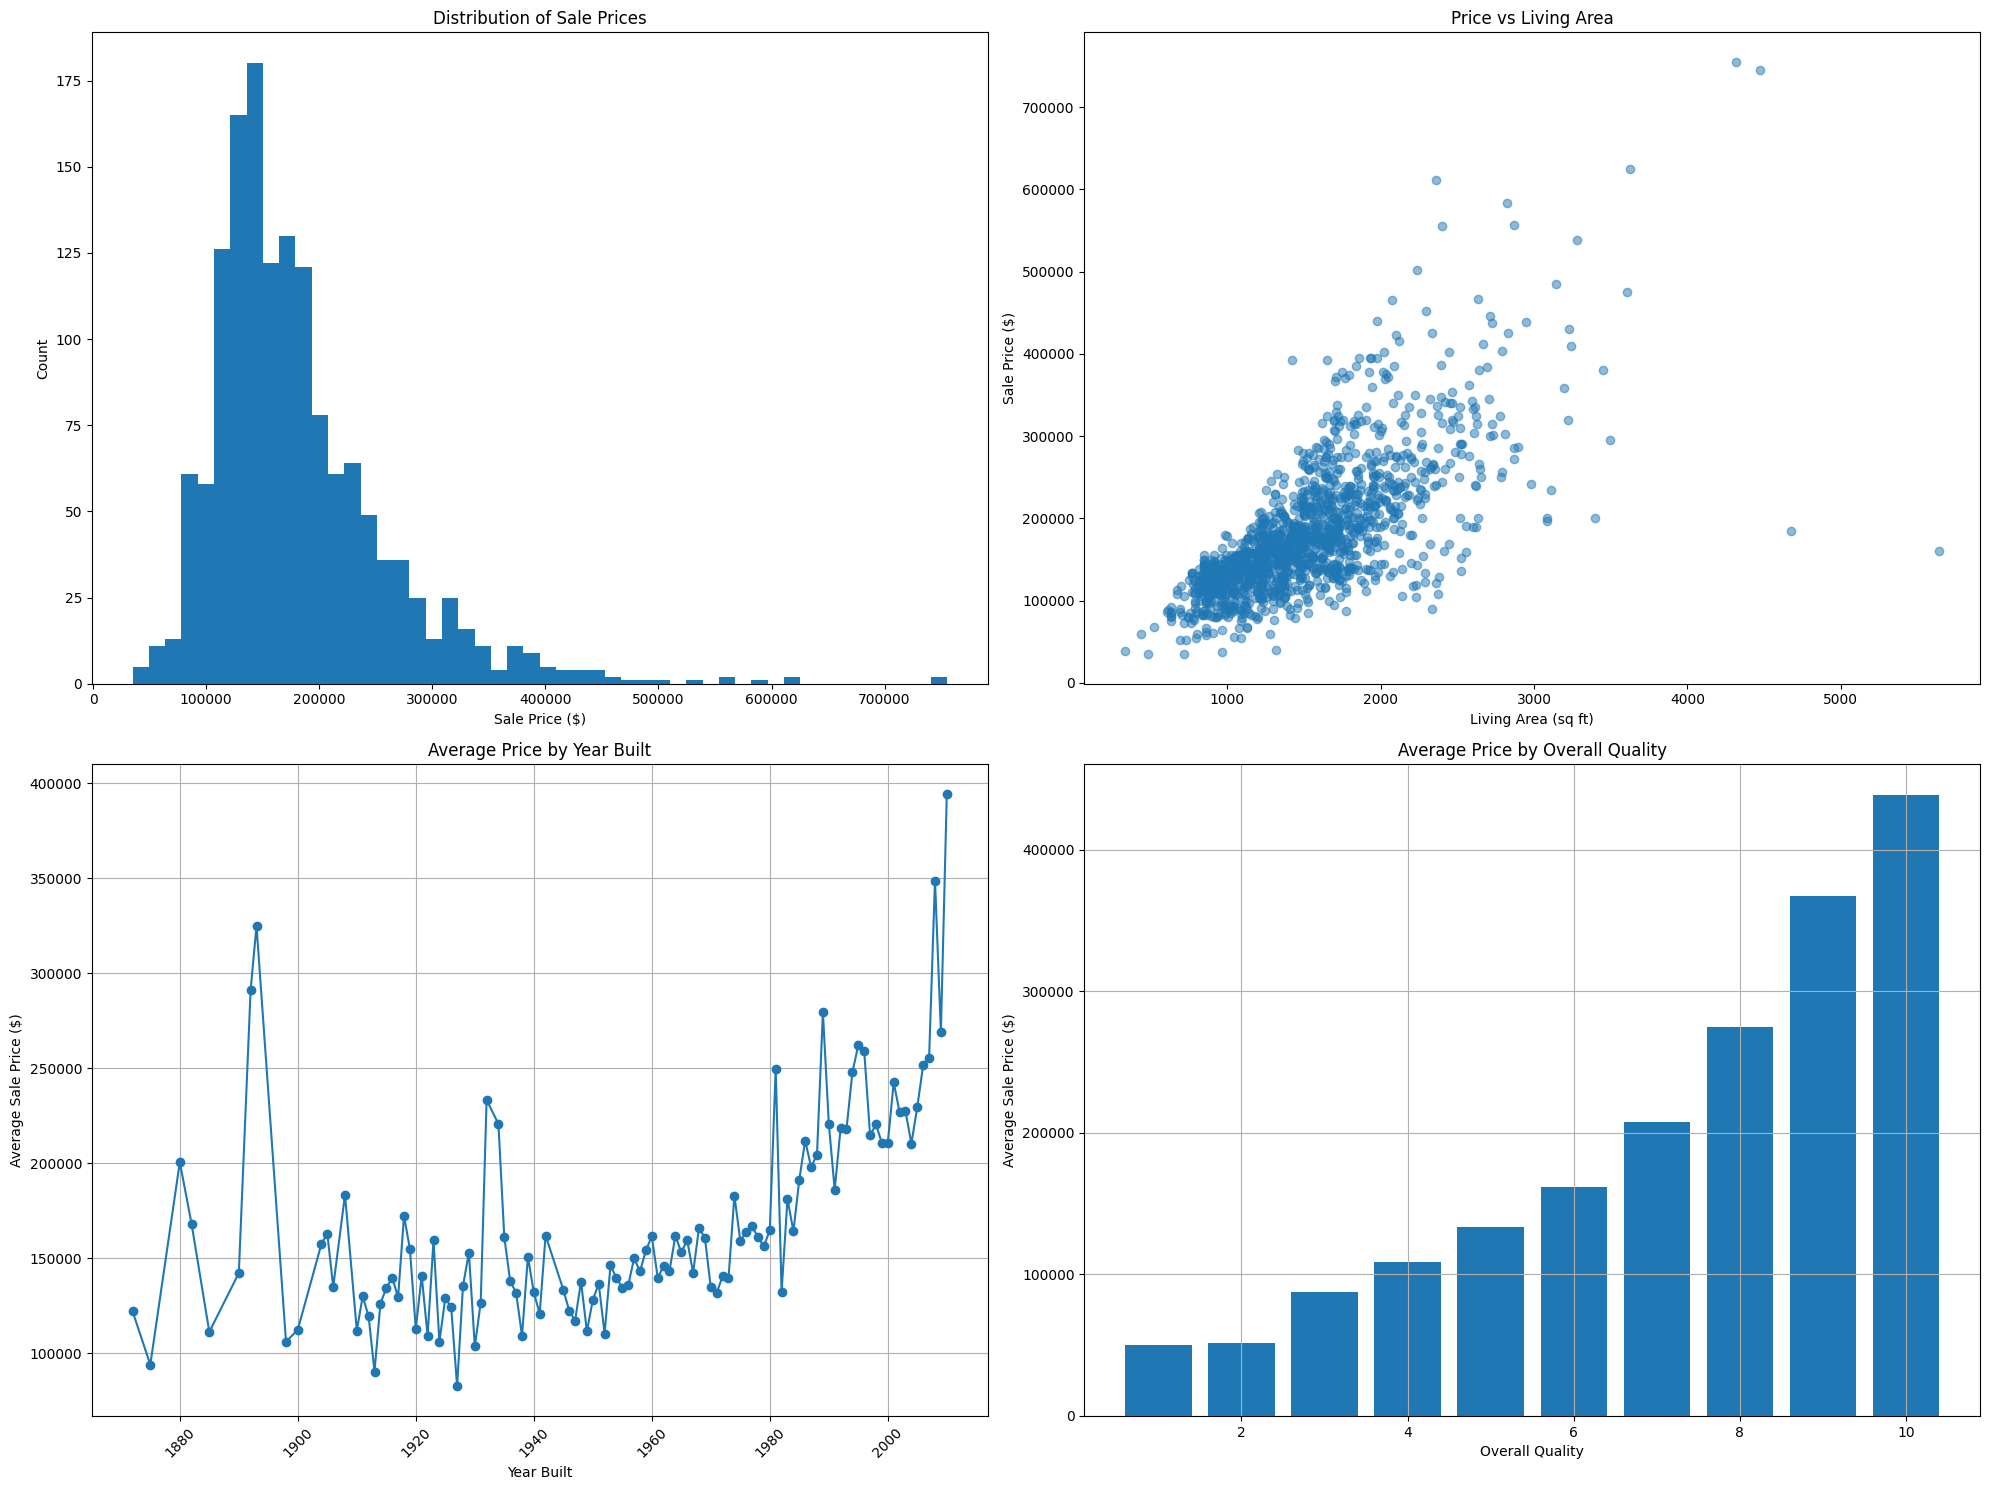

In [ ]:
# Create a figure
plt.figure(figsize=(20, 15))

# 1. Distribution of Sale Prices
plt.subplot(2, 2, 1)
plt.hist(df['SalePrice'], bins=50)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price ($)')
plt.ylabel('Count')

# 2. Price vs Living Area
plt.subplot(2, 2, 2)
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.5)
plt.title('Price vs Living Area')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Sale Price ($)')

# 3. Price vs Year Built
plt.subplot(2, 2, 3)
year_price = df.groupby('YearBuilt')['SalePrice'].mean()
plt.plot(year_price.index, year_price.values, marker='o')
plt.title('Average Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price ($)')
plt.xticks(rotation=45)
plt.grid(True)

# 4. Price vs Overall Quality
plt.subplot(2, 2, 4)
quality_price = df.groupby('OverallQual')['SalePrice'].mean()
plt.bar(quality_price.index, quality_price.values)
plt.title('Average Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price ($)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
# Summary analysis
print("\nSummary Statistics:")
print(df[['SalePrice', 'GrLivArea', 'YearBuilt', 'OverallQual']].describe())


Summary Statistics:
           SalePrice    GrLivArea    YearBuilt  OverallQual
count    1460.000000  1460.000000  1460.000000  1460.000000
mean   180921.195890  1515.463699  1971.267808     6.099315
std     79442.502883   525.480383    30.202904     1.382997
min     34900.000000   334.000000  1872.000000     1.000000
25%    129975.000000  1129.500000  1954.000000     5.000000
50%    163000.000000  1464.000000  1973.000000     6.000000
75%    214000.000000  1776.750000  2000.000000     7.000000
max    755000.000000  5642.000000  2010.000000    10.000000


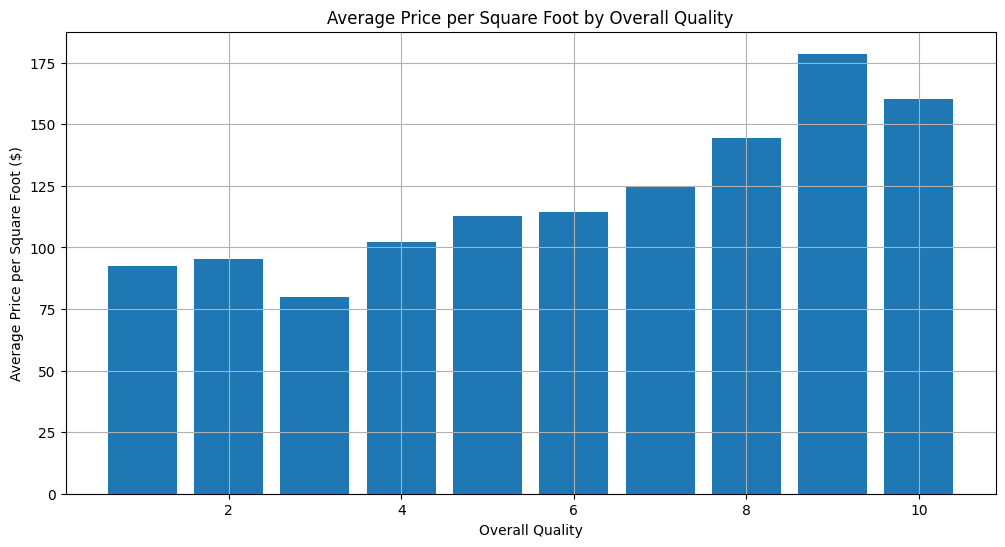

In [ ]:
# Price per square foot analysis
df['price_per_sqft'] = df['SalePrice'] / df['GrLivArea']
plt.figure(figsize=(12, 6))
quality_price_sqft = df.groupby('OverallQual')['price_per_sqft'].mean()
plt.bar(quality_price_sqft.index, quality_price_sqft.values)
plt.title('Average Price per Square Foot by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Average Price per Square Foot ($)')
plt.grid(True)
plt.show()

In [16]:
# Other statistics
print("\nInteresting Statistics:")
print(f"Average price per square foot: ${df['price_per_sqft'].mean():.2f}")
print(f"Most expensive house: ${df['SalePrice'].max():,.2f}")
print(f"Least expensive house: ${df['SalePrice'].min():,.2f}")
print(f"Average house age: {df['age'].mean():.1f} years")


Interesting Statistics:
Average price per square foot: $120.57
Most expensive house: $755,000.00
Least expensive house: $34,900.00
Average house age: 53.7 years
